In [2]:
import numpy as np
import data_reader as dr
import matplotlib.pyplot as plt
import toolkit as tk
from scipy.optimize import fsolve

%matplotlib inline

In [3]:
c9 = dr.sample(r"C:\Users\Scott Reid\Documents\Masters\Research\Data\ErTe3_C9")
c9.add_bridge('X', 44e-6, 8e-6, 2.6e-6)
c9.add_bridge('Y', 44e-6, 8e-6, 2.6e-6)
c9.add_bridge('a', 44e-6, 8e-6, 2.6e-6)
c9.add_bridge('c', 44e-6, 8e-6, 2.6e-6)

In [4]:
c9.book_files(output = False)

# (1) R vs. T: Finding the parallel resistance across the c axis voltage contacts

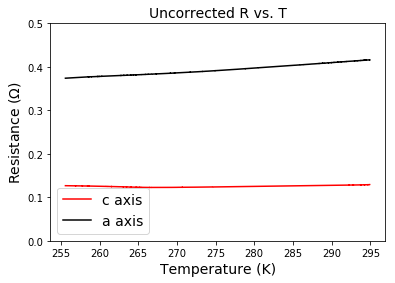

In [5]:
d, _ = c9.get_dat(2) #R vs. T data
d = d[np.logical_not(np.isnan(d['VXX']))]
rm = d['VXX']/d['IX']
ra = d['VYX']/d['IY']

fig, ax = plt.subplots()
plt.plot(d['TA'], rm, 'r', label = 'c axis')
plt.plot(d['TA'], ra, 'k', label = 'a axis')
plt.ylim([0,0.5])
plt.legend(fontsize = 14)
plt.xlabel('Temperature (K)', fontsize = 14)
plt.ylabel('Resistance ($\Omega$)', fontsize = 14)
plt.title('Uncorrected R vs. T', fontsize = 14)

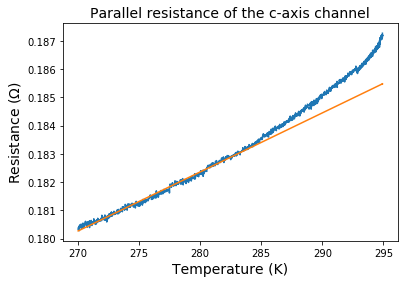

In [6]:
d = c9.get_dat(2)[0]
d = d[np.logical_not(np.isnan(d['VXX']))]
rm = d['VXX']/d['IX']
ra = d['VYX']/d['IY']

rp = rm*ra/(ra - rm)
cut = (d['TA'] > 270) & (d['TA'] < 285)
po = np.polyfit(d['TA'][cut], rp[cut], 1)

fig, ax = plt.subplots()
plt.plot(d['TA'][d['TA'] > 270], rp[d['TA'] > 270])
plt.plot(d['TA'][d['TA'] > 270], po[1] + po[0]*d['TA'][d['TA'] > 270])
plt.xlabel('Temperature (K)', fontsize = 14)
plt.ylabel('Resistance ($\Omega$)', fontsize = 14)
plt.title('Parallel resistance of the c-axis channel', fontsize = 14)

In [7]:
print(po)

[ 0.00020898  0.12384713]


$R_p(T) = 124 m\Omega + 0.209 m\Omega/K \;T$

In [8]:
# Calculates the parallel resistance across the c voltage terminals
def Rp(T):
    return 0.12384713 + 0.00020898 * T

# Calculates the actual resistal c resistance
def Rc(rm, T):
    return Rp(T)*rm/(Rp(T) - rm)

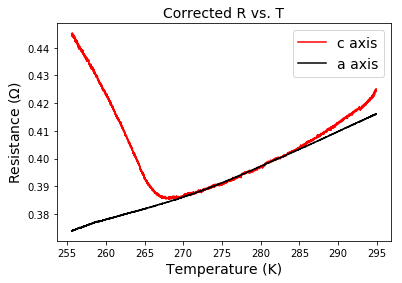

In [9]:
d, _ = c9.get_dat(2) #R vs. T data
d = d[np.logical_not(np.isnan(d['VXX']))]
rm = d['VXX']/d['IX']
ra = d['VYX']/d['IY']

fig, ax = plt.subplots()
plt.plot(d['TA'], Rc(rm, d['TA']), 'r', label = 'c axis')
plt.plot(d['TA'], ra, 'k', label = 'a axis')
plt.legend(fontsize = 14)
plt.xlabel('Temperature (K)', fontsize = 14)
plt.ylabel('Resistance ($\Omega$)', fontsize = 14)
plt.title('Corrected R vs. T', fontsize = 14)

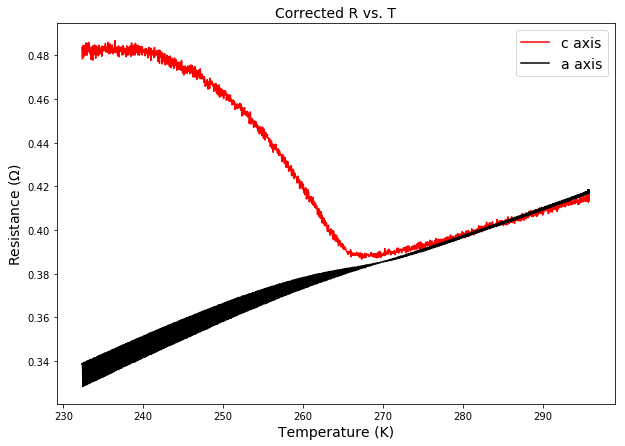

In [10]:
d = c9.get_dat(35)[0]
ra = d['VYX']/d['IY']
rm = d['VXX']/d['IX']
fig, ax = plt.subplots(figsize = (10,7))
plt.plot(d['TA'], Rc(rm, d['TA']), 'r', label = 'c axis')
plt.plot(d['TA'], ra, 'k', label = 'a axis')
plt.legend(fontsize = 14)
plt.xlabel('Temperature (K)', fontsize = 14)
plt.ylabel('Resistance ($\Omega$)', fontsize = 14)
plt.title('Corrected R vs. T', fontsize = 14)

(0, 0.5)

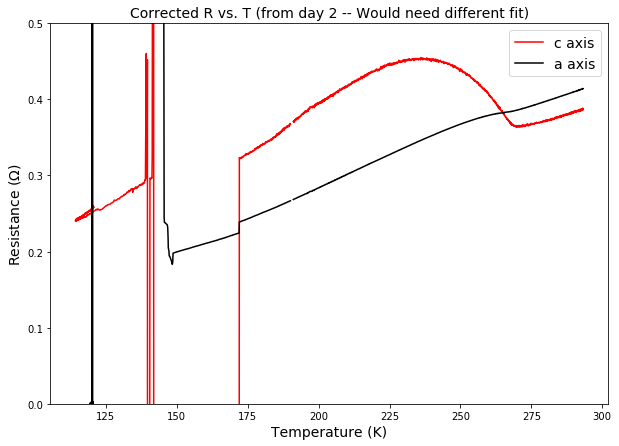

In [11]:
d = c9.get_dat(40)[0]
ra = d['VYX']/d['IY']
rm = d['VXX']/d['IX']
fig, ax = plt.subplots(figsize = (10,7))
plt.plot(d['TA'], Rc(rm, d['TA']), 'r', label = 'c axis')
plt.plot(d['TA'], ra, 'k', label = 'a axis')
plt.legend(fontsize = 14)
d = c9.get_dat(41)[0]
ra = d['VYX']/d['IY']
rm = d['VXX']/d['IX']
plt.plot(d['TA'], Rc(rm, d['TA']), 'r', label = 'c axis')
plt.plot(d['TA'], ra, 'k', label = 'a axis')
plt.xlabel('Temperature (K)', fontsize = 14)
plt.ylabel('Resistance ($\Omega$)', fontsize = 14)
plt.title('Corrected R vs. T (from day 2 -- Would need different fit)', fontsize = 14)
plt.ylim(0, 0.5)

Moral of the story: there is a parallel resistance that can be modeled as $R_p(T) = 109 m\Omega + 0.262 m\Omega/K$ across the c-axis voltage terminals

# (2) Measuring sliding along the a axis bridge

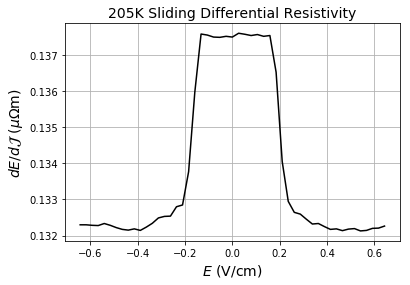

In [22]:
d, _ = c9.get_dat(24)
siga = tk.conductivity(v=d['VYX'], i = d['IY'], bridge = c9.b('a'))
i = d['IYO']
e = tk.E_field(l=c9.bl('a'), i=d['IY'], io = d['IYO'], v=d['VYX'])
T = d['TA'][0]
rp = Rp(T)

fig, ax = plt.subplots()
plt.plot(e/1e6, 1/siga*1e6, 'k')
plt.xlabel('$E$ (V/cm)', fontsize = 14)
plt.ylabel(r'$dE/d\mathcal{J}$ ($\mu\Omega$m)', fontsize = 14)
plt.title('205K Sliding Differential Resistivity', fontsize = 14)
plt.grid(True)

[ 0.03912742]
0.2999999999999998


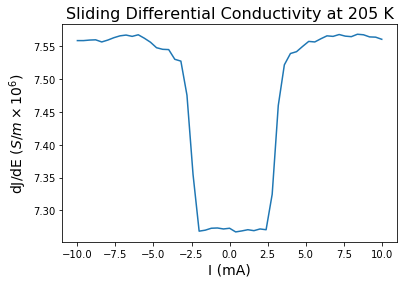

In [15]:
d, _ = c9.get_dat(24)
didv = d['IY']/d['VYX']
siga = tk.conductivity(v=d['VYX'], i = d['IY'], bridge = c9.b('a'))
plt.figure()
plt.plot(d['IYO']*1e3, siga*1e-6)
plt.xlabel('I (mA)', fontsize = 14)
plt.ylabel(r'dJ/dE ($S/m \times 10^{6}$)', fontsize = 14)
plt.title('Sliding Differential Conductivity at 205 K', fontsize = 16)
cmin = didv[d['IYO'] == 0]
cmax = didv[np.argmin(np.fabs(d['IYO'] - 0.005))]
print((cmax - cmin)/cmin)
print(7.55 - 7.25)

In [73]:
0.3/7.3

0.0410958904109589

[ 0.02014894]


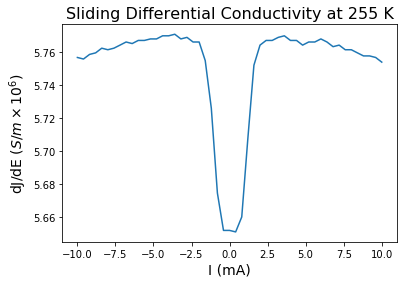

In [68]:
d, _ = c9.get_dat(18)
didv = d['IY']/d['VYX']
siga = tk.conductivity(v=d['VYX'], i = d['IY'], bridge = c9.b('a'))
plt.figure()
plt.plot(d['IYO']*1e3, siga*1e-6)
plt.xlabel('I (mA)', fontsize = 14)
plt.ylabel(r'dJ/dE ($S/m \times 10^{6}$)', fontsize = 14)
plt.title('Sliding Differential Conductivity at 255 K', fontsize = 16)
cmin = didv[d['IYO'] == 0]
cmax = didv[np.argmin(np.fabs(d['IYO'] - 0.005))]
print((cmax - cmin)/cmin)

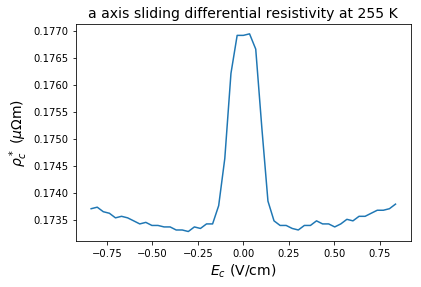

In [11]:
d, _ = c9.get_dat(18)
siga = tk.conductivity(v=d['VYX'], i = d['IY'], bridge = c9.b('a'))
i = d['IYO']
e = tk.E_field(l=c9.bl('a'), i=d['IY'], io = d['IYO'], v=d['VYX'])
T = d['TA'][0]
rp = Rp(T)

fig, ax = plt.subplots()
plt.plot(e/100, 1/siga*1e6)
plt.xlabel('$E_c$ (V/cm)', fontsize = 14)
plt.ylabel(r'$\rho_c^*$ ($\mu\Omega$m)', fontsize = 14)
plt.title('a axis sliding differential resistivity at 255 K', fontsize = 14)

(0, 0.21)

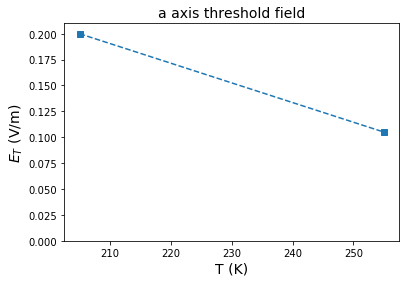

In [13]:
plt.subplots()
plt.plot([205, 255], [.20, .105], 's--')
plt.title('a axis threshold field', fontsize = 14)
plt.xlabel('T (K)', fontsize = 14)
plt.ylabel('$E_T$ (V/m)', fontsize = 14)
plt.ylim(0, 0.21)

# (3) c axis sliding
### TODO:
(1) Model electric field inside of bridge (think about how much current is flowing through the parallel resistor)

In [39]:
def c_cond(v, i, T):
    return 1/Rc(v/i, T)*c9.b('c')

def c_e(v, i, io, T):
    rm = v/i
    rc = Rc(rm, T)
    rhoc = c_cond(v, i, T)
    rp = Rp(T)
    return rhoc * io/(1+rc/rp) /c9.b('c')/c9.bl('c')

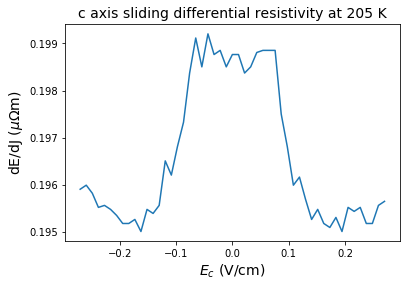

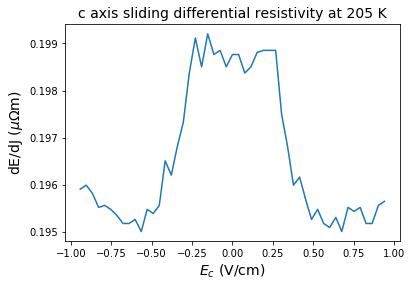

In [40]:
d, _ = c9.get_dat(23)
i = d['IXO']
T = d['TA'][0]
sigc = c_cond(d['VXX'], d['IX'], T)
e = tk.E_field(i=d['IX'], io = d['IXO'], v = d['VXX'], l = c9.bl('c'))
rm = d['VXX']/d['IX']
rc = Rc(rm, T)
rp = Rp(T)
ef = (1+rc/rp)*e

fig, ax = plt.subplots()
plt.plot(e/100, 1/sigc*1e6)
plt.xlabel('$E_c$ (V/cm)', fontsize = 14)
plt.ylabel(r'dE/dJ ($\mu\Omega$m)', fontsize = 14)
plt.title('c axis sliding differential resistivity at 205 K', fontsize = 14)

fig, ax = plt.subplots()
plt.plot(ef/100, 1/sigc*1e6)
plt.xlabel('$E_c$ (V/cm)', fontsize = 14)
plt.ylabel(r'dE/dJ ($\mu\Omega$m)', fontsize = 14)
plt.title('c axis sliding differential resistivity at 205 K', fontsize = 14)

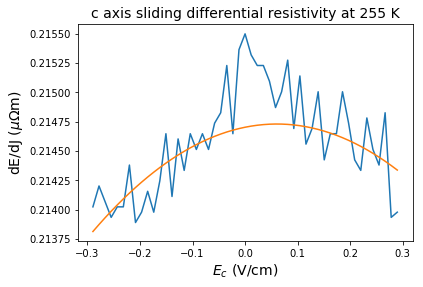

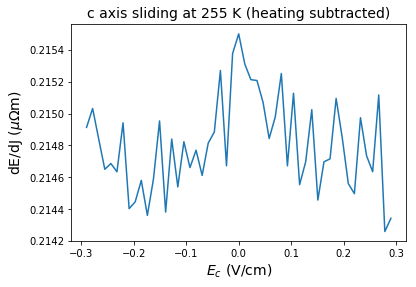

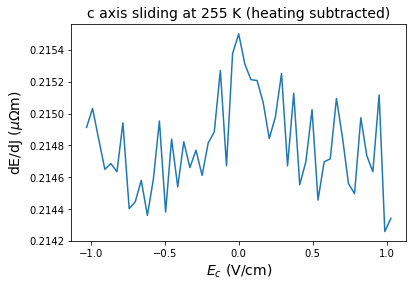

In [41]:
d, _ = c9.get_dat(19)
i = d['IXO']
T = d['TA'][0]
sigc = c_cond(d['VXX'], d['IX'], T)
e = tk.E_field(i=d['IX'], io = d['IXO'], v = d['VXX'], l = c9.bl('c'))
rm = d['VXX']/d['IX']
rc = Rc(rm, T)
rp = Rp(T)
ef = (1+rc/rp)*e

cut = np.fabs(i) > 0.003
po = np.polyfit(e[cut], 1/sigc[cut]*1e6, 2)

fig, ax = plt.subplots()
plt.plot(e/100, 1/sigc*1e6)
plt.plot(e/100, po[0]*e*e + po[1]*e+po[2])
plt.xlabel('$E_c$ (V/cm)', fontsize = 14)
plt.ylabel(r'dE/dJ ($\mu\Omega$m)', fontsize = 14)
plt.title('c axis sliding differential resistivity at 255 K', fontsize = 14)

plt.subplots()
rho_cor = 1/sigc*1e6 - (po[0]*e*e + po[1]*e)
plt.plot(e/100, rho_cor)
plt.xlabel('$E_c$ (V/cm)', fontsize = 14)
plt.ylabel(r'dE/dJ ($\mu\Omega$m)', fontsize = 14)
plt.title('c axis sliding at 255 K (heating subtracted)', fontsize = 14)

plt.subplots()
rho_cor = 1/sigc*1e6 - (po[0]*e*e + po[1]*e)
plt.plot(ef/100, rho_cor)
plt.xlabel('$E_c$ (V/cm)', fontsize = 14)
plt.ylabel(r'dE/dJ ($\mu\Omega$m)', fontsize = 14)
plt.title('c axis sliding at 255 K (heating subtracted)', fontsize = 14)

# (4) No correlation in Monceau Planes - Independent Sliding

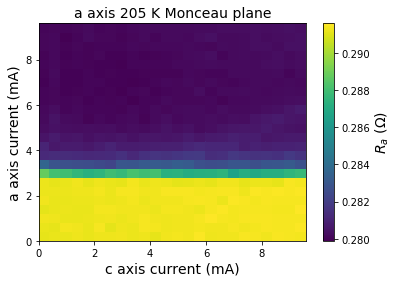

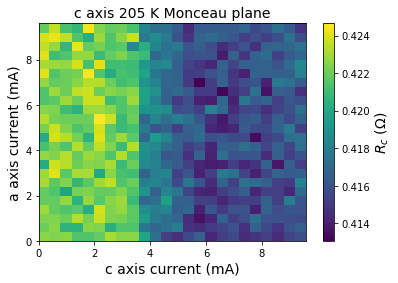

In [42]:
d = c9.get_dat(28)[0]

n = int(np.sqrt(len(d['IYO'])))
yr = np.arange(min(d['IYO']), max(d['IYO']), (max(d['IYO']) - min(d['IYO']))/n)
xr = np.arange(min(d['IXO']), max(d['IXO']), (max(d['IXO']) - min(d['IXO']))/n)

y, x = np.meshgrid(yr, xr)
z1 = (d['VYX']/d['IY']).reshape(n, n)
z2 = Rc(rm=d['VXX']/d['IX'], T = 205).reshape(n,n)

fig, ax = plt.subplots()
ax = plt.pcolor(x*1e3,y*1e3,z1)
cb = fig.colorbar(ax)
cb.set_label('$R_a$ ($\Omega$)', fontsize = 14)
plt.xlabel('c axis current (mA)', fontsize = 14)
plt.ylabel('a axis current (mA)', fontsize = 14)
plt.title('a axis 205 K Monceau plane', fontsize = 14)

fig, ax = plt.subplots()
ax = plt.pcolor(x*1e3,y*1e3,z2)
cb = fig.colorbar(ax)
cb.set_label('$R_c$ ($\Omega$)', fontsize = 14)
plt.xlabel('c axis current (mA)', fontsize = 14)
plt.ylabel('a axis current (mA)', fontsize = 14)
plt.title('c axis 205 K Monceau plane', fontsize = 14)

# (5) TODO Modeling Heating

# (6) Resistivities, Sliding Resistivities, and Extraconductivities over T

### TODO: 
(1) Give seperate temperature arrays for each offset/measurement <br>
(2) Incorporate heating model

In [43]:
def read_offsets(ns):
    t = np.ndarray(0)
    sigao = np.ndarray(0)
    sigac = np.ndarray(0)
    sigco = np.ndarray(0)
    sigcc = np.ndarray(0)
    
    for n in ns:
        d, _ = c9.get_dat(n)
        T = d['TA']
        siga = tk.conductivity(bridge = c9.b('a'), i = d['IY'], v = d['VYX'])
        sigc = c_cond(d['VXX'], d['IX'], T)
        tt = T[(d['IYO'] == 0) & (d['IXO'] == 0)]
        ao = siga[(d['IYO'] == 0) & (d['IXO'] == 0)]
        ac = siga[d['IYO'] != 0]   
        co = sigc[(d['IYO'] == 0) & (d['IXO'] == 0)]
        cc = sigc[d['IXO'] != 0]
        
        l = np.min([len(tt), len(ao), len(ac), len(cc)])
        t = np.concatenate((t, tt[0:l]))
        sigao = np.concatenate((sigao, ao[0:l]))
        sigac = np.concatenate((sigac, ac[0:l]))
        sigco = np.concatenate((sigco, co[0:l]))
        sigcc = np.concatenate((sigcc, cc[0:l]))
    return t, sigao, sigac, sigco, sigcc

def read_offsets_c(ns):
    t = np.ndarray(0)
    sigco = np.ndarray(0)
    sigcc = np.ndarray(0)
    
    for n in ns:
        d, _ = c9.get_dat(n)
        T = d['TA']
        sigc = c_cond(d['VXX'], d['IX'], T)
        tt = T[(d['IYO'] == 0) & (d['IXO'] == 0)]
        co = sigc[(d['IYO'] == 0) & (d['IXO'] == 0)]
        cc = sigc[d['IXO'] != 0]
        
        l = np.min([len(tt), len(co), len(cc)])
        t = np.concatenate((t, tt[0:l]))
        sigco = np.concatenate((sigco, co[0:l]))
        sigcc = np.concatenate((sigcc, cc[0:l]))
    return t, sigco, sigcc

In [44]:
def read_offsets2(ns):
    tao = np.ndarray(0)
    tac = np.ndarray(0)
    tco = np.ndarray(0)
    tcc = np.ndarray(0)
    sigao = np.ndarray(0)
    sigac = np.ndarray(0)
    sigco = np.ndarray(0)
    sigcc = np.ndarray(0)
    
    for n in ns:
        d, _ = c9.get_dat(n)
        T = d['TA']
        siga = tk.conductivity(bridge = c9.b('a'), i = d['IY'], v = d['VYX'])
        sigc = c_cond(d['VXX'], d['IX'], T)
        
        ao = siga[(d['IYO'] == 0) & (d['IXO'] == 0)]
        Tao = T[(d['IYO'] == 0) & (d['IXO'] == 0)]
        ac = siga[d['IYO'] != 0]
        Tac = T[d['IYO'] != 0]
        co = sigc[(d['IYO'] == 0) & (d['IXO'] == 0)]
        Tco = T[(d['IYO'] == 0) & (d['IXO'] == 0)]
        cc = sigc[d['IXO'] != 0]
        Tcc = T[d['IXO'] != 0]
        
        sigao = np.concatenate((sigao, ao))
        tao = np.concatenate((tao, Tao))
        sigac = np.concatenate((sigac, ac))
        tac = np.concatenate((tac, Tac))
        sigco = np.concatenate((sigco, co))
        tco = np.concatenate((tco, Tco))
        sigcc = np.concatenate((sigcc, cc))
        tcc = np.concatenate((tcc, Tcc))
    return tao, sigao, tac, sigac, tco, sigco, tcc, sigcc

In [45]:
tao, sigao, tac, sigac, tco, sigco, tcc, sigcc = read_offsets2([34,35])

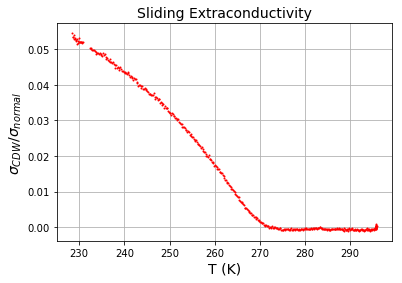

In [71]:
ta_off = 0.6
tc_off = 0.6
# ta_off = 0
# tc_off = 0

plt.figure()
plt.grid(True)
tao, sigao, tac, sigac, tco, sigco, tcc, sigcc = read_offsets2([31, 34,35])
plt.plot(tao[tao > 220], tk.extraconductivity(tao, tac+ta_off, sigao, sigac)[tao > 220]/sigco[tao > 220], 'r.', ms = 2)
# plt.plot(tco, tk.extraconductivity(tco, tcc+tc_off, sigco, sigcc), 'k.', ms = 2)
# plt.plot(205.5, 0.108e6, 'ks', ms = 8, label = 'c axis')
# plt.plot(255.5, 0.0126e6, 'ks', ms = 8)
# plt.plot(205.5, .286e3, 'rs', ms = 8, label = 'c axis')
# plt.plot(255.5, .105e3, 'rs', ms = 8)
# t, sigao, sigac, sigco, sigcc = read_offsets([31, 34, 35])
# plt.plot(t, sigac-sigao)
# plt.xlim(270, 290)
# plt.ylim(-30000, 30000)
# plt.legend(fontsize = 14)
plt.xlabel('T (K)', fontsize = 14)
plt.ylabel(r'$\sigma_{CDW} / \sigma_{normal}$', fontsize = 14)
plt.title('Sliding Extraconductivity', fontsize = 14)

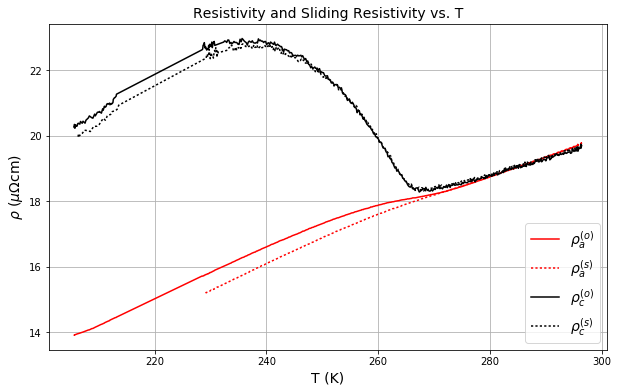

In [149]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.plot(tao, 1e8/sigao, 'r', ms = 3, label = r'$\rho_{a}^{(o)}$')
plt.plot(tac+ta_off, 1e8/sigac, 'r:', ms = 3, label = r'$\rho_{a}^{(s)}$')
plt.plot(tco, 1e8/sigco, 'k', ms = 3, label = r'$\rho_{c}^{(o)}$')
plt.plot(tcc+tc_off, 1e8/sigcc, 'k:', ms = 3, label = r'$\rho_{c}^{(s)}$')
plt.legend(fontsize = 14)
plt.xlabel('T (K)', fontsize = 14)
plt.ylabel(r'$\rho$ ($\mu\Omega$cm)', fontsize = 14)
plt.title('Resistivity and Sliding Resistivity vs. T', fontsize = 14)

In [152]:
tt, sigcot, sigcct = read_offsets_c([33,34,35])

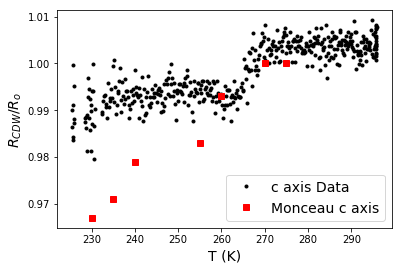

In [154]:
plt.plot(tt, sigcot/sigcct, 'k.', label = 'c axis Data')
plt.plot([240,235, 255, 260, 270, 275, 230], [0.979, 0.971, 0.983, 0.993, 1, 1, 0.967], 'rs', label = 'Monceau c axis')
plt.legend(fontsize = 14)
plt.xlabel('T (K)', fontsize = 14)
plt.ylabel('$R_{CDW}/R_{o}$', fontsize = 14)

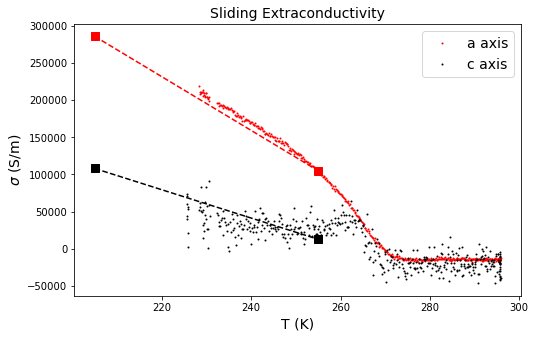

In [26]:
fig, ax = plt.subplots(figsize = (8,5))
plt.plot(t, (sigac-sigao), 'r.', ms = 2, label = 'a axis')
plt.plot(205, .286e6, 'rs', ms = 8)
plt.plot(255, .105e6, 'rs', ms = 8)
plt.plot([205, 255], [.286e6, .105e6], 'r--')
plt.plot(tt, (sigcct-sigcot), 'k.', ms = 2, label = 'c axis')
# plt.plot(t, ((sigac-sigao) + (sigcc-sigco))*1e-6, 'b.', ms = 2)
plt.plot(205, 0.108e6, 'ks', ms = 8)
plt.plot(255, 0.0126e6, 'ks', ms = 8)
plt.plot([205, 255], [0.108e6, 0.0126e6], 'k--')
plt.legend(fontsize = 14)
plt.xlabel('T (K)', fontsize = 14)
plt.ylabel('$\sigma$ (S/m)', fontsize = 14)
plt.title('Sliding Extraconductivity', fontsize = 14)

# (7) What is the electric field in the c axis as a function of temperature for offset measurements? Is it enough to supply threshold field?

In [27]:
# t, sigao, sigac, sigco, sigcc = read_offsets([31, 34, 35])
d = c9.get_dat(35)[0]
io = max(d['IXO'])
d = d[d['IXO'] == 0]
t = d['TA']
rm = d['VXX']/d['IX']
rp = Rp(T)
e = np.ndarray(len(d))
i = d['IX'][0]

i = np.array([i,i])
io = np.array([0, io])
for k in range(len(d)):
    v = d['VXX'][k]
    e[k] = tk.E_field(i=i, io = io, v = np.array([v,v]), l = c9.bl('c'))[1]

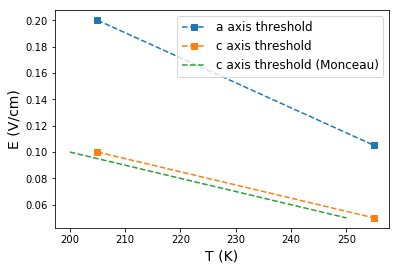

In [155]:
# plt.plot(t, e/100, 'k', ms = 2, label = 'c axis e field')
plt.plot([205, 255], [.20, .105], 's--', label = 'a axis threshold')
plt.plot([205, 255], [0.1, 0.05], 's--', label = 'c axis threshold')
plt.plot([200, 250], [0.1, 0.05], '--', label = 'c axis threshold (Monceau)')
plt.legend(fontsize = 12)
plt.xlabel('T (K)', fontsize = 14)
plt.ylabel('E (V/cm)', fontsize = 14)

# (7) *Speculative* a Sliding Length Scale

### TODO:
(1) Improve by incorporating heating model, different temperature interpolation <br>
(3) Put on plot alongside sliding extraconductivity <br>
(4) Mean free path model (exponential)???

In [29]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [30]:
#BLOCK SLIDING MODEL

def L(ns):
    t, sigao, sigac, sigco, sigcc = read_offsets(ns)
    
    rhom = 1/sigcc
    rho = 1/sigco
    rhoc = 1/(sigco + sigac - sigao)
    lo = 44
    
    return t, lo/2 * (rhom - rho)/(rhoc - rho)

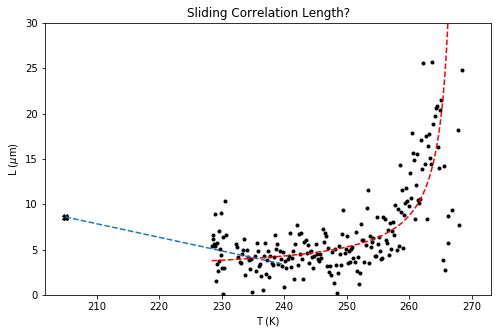

In [31]:
fig, ax = plt.subplots(figsize = (8,5))
t, l = L([34, 35])
l = l[t < 270]
t = t[t < 270]
# plt.plot(t, l, 'k.')
plt.plot(205, 8.6, 'kX')
# sl = smooth(l,2)
plt.plot(t, l, 'k.')
plt.plot(t[t < 268], -1/(.02*(t - 268))[t<268] + 2.5, 'r--')
ts = np.array([205, 240])
plt.plot(ts, 8.6 - 0.15*(ts - 205), '--')
# plt.plot([205, t[0]], [8.6, sl[4]])
plt.ylim([0,30])
plt.xlabel('T (K)')
plt.ylabel('L ($\mu$m)')
plt.title('Sliding Correlation Length?')

Note: need to factor heating effects into my consideration, and also consider the possibility of fringe effects or sliding in the voltage contacts themselves.

In [32]:
#MEAN FREE PATH METHOD
#THERE ARE PROBLEMS WITH THIS METHOD AS OF NOW

def L2(d):
    T = d['TA']
    siga = tk.conductivity(bridge = c9.b('a'), i = d['IY'], v = d['VYX'])
    sigc = c_cond(d['VXX'], d['IX'], T)

    t = T[(d['IYO'] == 0) & (d['IXO'] == 0)]
    sigao = siga[(d['IYO'] == 0) & (d['IXO'] == 0)]
    sigac = siga[d['IYO'] != 0]

    sigco = sigc[(d['IYO'] == 0) & (d['IXO'] == 0)]
    sigcc = sigc[d['IXO'] != 0]
    
    rho = 1/sigco
    sigc = sigac - sigao
    rhom = 1/sigcc
    Lo = 44
    
    a = rho*sigc
    b = rhom/rho
    
    x = np.ndarray(len(a))
    for i in range(len(a)):
        func = lambda x : (1+a[i])*x**b[i] - (x+a[i])
        x_guess = 0.5
        x[i] = fsolve(func, x_guess)
    
    return Lo/(2*np.log(x))

# (8) Other explanations for c axis extraconductivity:

(1) Fringe effects at contacts -> hard to model, but what would the extraconductivity have to be in the contacts to explain the whole effect? <br>
(2) Heating... does not explain everything, but perhaps it explains something <br>
(3) Something in the parallel resistor? <br>
(4) We are reaching threshold field inside shorted out bridge portion down to a certain temperature

# Important runs:
### R vs. T: 
- 2 (295K - 255K)
- 21 (255K - 205K)
- 40 (295 - 190)
- 41 (190 - 120, contact jumps)

### Sliding at 255K:
- 6 (diagonal??)
- 8 (c)
- 13 (diagonal)
- 14 (diagonal)
- 18 (a axis)
- 19 (c axis)

### Sliding at 205K:
- 23 (c axis)
- 24 (a axis)
- 25 (a axis, c axis disconnected)
- 26 (diagonal)
- 28 (plane)
- 29 (diagonal)
- 30 (plane in diagonal config)

### Attempted Sliding at 120K
- 42, 43, 44, 45, 46, 47
- 48, 49 (contact failure)

### Offset R vs. T
- 35 (235 - 295)
- 33, 34 also

### Heating at 295 K
- 36 (plane)
- 38 (plane)